<a href="https://colab.research.google.com/github/Ghanashyam-Bhat/Summer_2/blob/main/CDSAML-PersonalityAnalysisForOnlineProfilles/DataAnalysisCDSAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file1 = pd.read_csv("/content/drive/MyDrive/cdsaml/Dataset/dataset.csv")
file2 = pd.read_csv("/content/drive/MyDrive/cdsaml/Dataset/datasetj.csv")
df = pd.concat([file1,file2],axis= 0)
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Count,Pixels,Quality,Faces,Eyes,People,Objects,Open_Eyes,Emotions,Dominent_Emotion,Emotion_Score,Face_Area_Ratio,Mid_Diag_Ratio,Eye_Area_Ratio
0,0,1000,[[[164 180 192]\n [164 180 192]\n [164 180 1...,52.307330,7,0,9,1,1,"[{'box': [3509, 551, 297, 415], 'emotions': {'...",angry,0.64,0.039486,0.142754,NaN
1,1,1001,[[[17 17 17]\n [17 17 17]\n [17 17 17]\n .....,82.125622,1,1,3,0,1,"[{'box': [2464, 787, 768, 1078], 'emotions': {...",happy,0.42,0.035267,0.096215,0.749012
2,2,1002,[[[ 5 21 33]\n [ 5 21 33]\n [ 5 21 ...,54.633768,1,0,1,0,1,"[{'box': [599, 581, 580, 787], 'emotions': {'a...",happy,0.91,0.082357,0.112225,NaN
3,3,1003,[[[111 55 30]\n [111 55 30]\n [111 55 ...,92.808653,1,2,1,0,1,"[{'box': [723, 517, 1084, 1578], 'emotions': {...",neutral,0.48,0.083735,0.196465,0.637818
4,4,1004,[[[226 228 222]\n [226 228 222]\n [226 228 2...,64.850783,2,1,2,0,1,"[{'box': [291, 877, 596, 812], 'emotions': {'a...",happy,0.98,0.071750,0.257544,0.165246


In [ ]:
df.isnull().sum()

index                0
Count                0
Pixels               0
Quality              0
Faces                0
Eyes                 0
People               0
Objects              0
Open_Eyes            0
Emotions             0
Dominent_Emotion     0
Emotion_Score        0
Face_Area_Ratio      0
Mid_Diag_Ratio       0
Eye_Area_Ratio      50
dtype: int64

In [ ]:
df.drop(['Eye_Area_Ratio'],axis=1,inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.drop(['Emotions'],axis=1,inplace=True)
df.drop(['Emotion_Score'],axis=1,inplace=True)
df.drop(['Pixels'],axis=1,inplace=True)

In [ ]:
for i in df[df["Quality"]<=90]["Quality"].index:
  df["Quality"][i] = 1
for i in df[df["Quality"]>90]["Quality"].index:
  df["Quality"][i] = 0

for i in df[df["Eyes"]<=0]["Eyes"].index:
  df["Eyes"][i] = 0
for i in df[df["Eyes"]>=1]["Eyes"].index:
  df["Eyes"][i] = 1


for i in df[df["Dominent_Emotion"]=="happy"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 1
for i in df[df["Dominent_Emotion"]=="neutral"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.7
for i in df[df["Dominent_Emotion"]=="angry"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.3
for i in df[df["Dominent_Emotion"]=="disgust"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.3
for i in df[df["Dominent_Emotion"]=="surprise"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.6
for i in df[df["Dominent_Emotion"]=="sad"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.3
for i in df[df["Dominent_Emotion"]=="fear"]["Dominent_Emotion"].index:
  df["Dominent_Emotion"][i] = 0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.p

In [ ]:
df.head()


,Count,Quality,Faces,Eyes,People,Objects,Open_Eyes,Dominent_Emotion,Face_Area_Ratio,Mid_Diag_Ratio
0,1000,1.0,7,0,9,1,1,0.3,0.039486,0.142754
1,1001,1.0,1,1,3,0,1,1,0.035267,0.096215
2,1002,1.0,1,0,1,0,1,1,0.082357,0.112225
3,1003,0.0,1,1,1,0,1,0.7,0.083735,0.196465
4,1004,1.0,2,1,2,0,1,1,0.071750,0.257544


In [ ]:
for i in df[df["Faces"]==0]["Faces"].index:
  df["Faces"][i] = 1
for i in df[df["People"]==0]["People"].index:
  df["People"][i] = 1
for i in df[df["Objects"]==0]["Objects"].index:
  df["Objects"][i] = 1
for i in df[df["Quality"]==0]["Quality"].index:
  df["Quality"][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Quality = 1.5*(1/df["Quality"])
Faces = 2*(1/df["Faces"])
Eyes = 0.2*df["Eyes"]
People = 0.4*(1/df["People"])
Objects = 0.3*(1/df["Objects"])
Open_Eyes = 0.8*df["Open_Eyes"]
Face_area = 2*df["Face_Area_Ratio"]/0.1
Face_diag = 0.3*df["Mid_Diag_Ratio"]/0.25
Dominent_Emotion = 2.5*df["Dominent_Emotion"]

In [ ]:
Total = Quality+Faces+Eyes+People+Objects+Open_Eyes+Face_area+Face_diag+Dominent_Emotion

In [ ]:
print(max(Total))

13.586080443793264


In [ ]:
df["Score"] = (Total/15)*100

In [ ]:
df[df["Score"]==min(df["Score"])]

,Count,Quality,Faces,Eyes,People,Objects,Open_Eyes,Dominent_Emotion,Face_Area_Ratio,Mid_Diag_Ratio,Score
295,158,1.0,2,1,3,1,0,0.3,0.026242,0.07817,30.013188
381,268,1.0,2,1,3,1,0,0.3,0.026242,0.07817,30.013188


In [ ]:
df[df["Score"]==max(df["Score"])]

,Count,Quality,Faces,Eyes,People,Objects,Open_Eyes,Dominent_Emotion,Face_Area_Ratio,Mid_Diag_Ratio,Score
71,1085,1.0,1,1,1,1,1,1,0.292163,0.03569,90.57387


In [ ]:
# df.sort_values(by=['Score']).head()

Regression Model (SVR)

In [ ]:
df["Score"].isnull().sum()

0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import and split the data and classes
dataset = df
X_total = dataset.iloc[:, 1:10].values
Y_total = dataset.iloc[:,10 ].values

from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size = 0.20, random_state = 0)


In [ ]:
len(X) #Reshape Row length

380

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


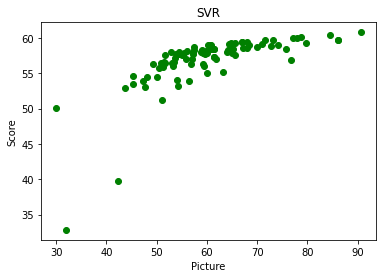

In [ ]:

# features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Y = Y.reshape(-1,1)
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

# Fitting Regression modelto the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='linear') # add this parametre kernel='rbf'
regressor.fit(X,Y)

# predicts a new result with polyn reg
# y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform())

# Visualisation the regression result
# plt.scatter(X, Y,color='red')
# plt.plot(Y, regressor.predict(X), color='red')

# X_test = sc_X.transform(X_test)
Y_pred = regressor.predict(X_test)
Y_pred = sc_Y.inverse_transform(Y_pred.reshape(-1,1))
plt.scatter(Y_test, Y_pred, color='green')
plt.title('SVR')
plt.xlabel('Picture')
plt.ylabel('Score')
plt.show()

In [ ]:
print(Y)
print(X)

[[-0.04435556]
 [ 0.76588086]
 [-1.11386537]
 [ 0.17341646]
 [-0.3788104 ]
 [-0.4374256 ]
 [-1.71916412]
 [-0.21602137]
 [-1.07312495]
 [-0.28932427]
 [ 1.08415706]
 [ 1.20181925]
 [ 0.06223112]
 [-0.18518567]
 [ 1.45016819]
 [ 1.21180539]
 [-1.10714829]
 [-1.24924297]
 [-0.71379736]
 [-0.07096987]
 [ 0.43600203]
 [ 0.6119594 ]
 [ 0.01415245]
 [-0.35393826]
 [-1.82615332]
 [ 0.16377761]
 [-1.05980292]
 [-1.31242359]
 [ 0.57480077]
 [ 0.83825738]
 [ 0.51696288]
 [ 0.08101431]
 [-0.33620784]
 [-0.73663548]
 [-0.36708443]
 [-2.58007517]
 [ 2.16748563]
 [-0.22230223]
 [ 0.29534019]
 [ 0.13543696]
 [-0.82012702]
 [-0.62845119]
 [ 0.24213323]
 [-0.8613653 ]
 [ 0.56119431]
 [-1.07312495]
 [-0.87300799]
 [ 2.30997927]
 [ 0.35605789]
 [ 0.35951976]
 [-1.41246139]
 [-1.49783277]
 [ 2.51060941]
 [ 0.10983833]
 [-0.20421435]
 [ 0.02417626]
 [-0.23056725]
 [-1.51242723]
 [-0.20231065]
 [ 0.14864266]
 [ 0.52604284]
 [ 0.02104179]
 [ 0.91484018]
 [-0.09850283]
 [ 0.22074711]
 [-1.07312495]
 [-1.00033

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

errors = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [ ]:
Y_pred.reshape(1,-1)

array([[58.40724012, 56.56213153, 57.87615564, 58.08386355, 58.16665668,
        57.05303111, 56.39195752, 58.65288924, 56.01771526, 59.36448619,
        57.73544394, 60.08282307, 59.28676076, 57.81317862, 57.17462014,
        58.07645617, 58.94277104, 52.89017454, 57.73806574, 56.36629234,
        39.8191816 , 59.69307158, 58.34593311, 53.91284965, 57.8024473 ,
        56.52127822, 32.82612907, 57.71358383, 58.96712692, 56.25019248,
        58.15130082, 58.26759054, 57.91132586, 56.98296527, 56.54521238,
        59.00343533, 57.7949746 , 54.49313704, 58.01826745, 58.47737489,
        59.20761626, 56.29581308, 58.86730999, 58.53138586, 57.54052645,
        53.10178758, 59.36031797, 53.2455438 , 60.43677791, 54.41959743,
        58.50671038, 58.57439291, 55.8931706 , 59.22252815, 58.48750245,
        59.64695915, 51.28128849, 57.97529052, 55.74962522, 54.09368152,
        57.85179228, 57.67057751, 57.71820932, 58.65288924, 57.08863307,
        54.60254432, 53.95441287, 58.50429106, 59.4

In [ ]:
Y_test

array([65.1555767350225, 51.51447741330079, 65.03540747642386,
       63.91097860859991, 55.98168088855896, 61.74284224933968,
       50.86456572312302, 60.75787887541172, 53.25812364663488,
       67.02169366271686, 54.39189527094312, 78.67609789738475,
       65.65155996272779, 59.2842946914658, 53.7039684150592,
       54.428146616987206, 68.38542043303923, 43.69132515054417,
       59.588203715832655, 59.26600200740317, 42.345060996069456,
       86.17348267195601, 64.16714228726428, 47.327295834431936,
       55.19905842034167, 52.98408339000731, 32.011364457581074,
       53.89045253174539, 74.23943539497532, 56.8820152792729,
       64.73526268799397, 57.38735355811523, 57.23931761247171,
       55.815987078549654, 53.424806280166734, 60.90475685627747,
       55.24593998469807, 48.18063691918467, 58.859188583904654,
       60.883911359758216, 64.47069722241075, 49.24600219268955,
       72.75830762018515, 67.28698008866088, 55.027495408321094,
       47.71581713638178, 66.95683

In [ ]:
r2

0.24144276940610532

In [ ]:
errors

85.32021878275454

Classification Model(SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = df 
df["Category"] = df["Quality"]
print(np.mean(dataset["Score"]))
for i in dataset[dataset["Score"]<60]["Score"].index:
  dataset["Category"][i] = "No"
for i in dataset[dataset["Score"]>=60]["Score"].index:
  dataset["Category"][i] = "Yes"

59.033433808616984


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X_total = dataset.iloc[:, 1:10].values
Y_total = dataset.iloc[:,11].values

from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(X_total, Y_total, test_size = 0.20, random_state = 0)


In [ ]:

# features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Y = Y.reshape(-1,1)
X = sc_X.fit_transform(X)
# Y = sc_Y.fit_transform(Y)

In [ ]:
from sklearn import svm
cl = svm.SVC(kernel='linear', C=0.01)
cl.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, kernel='linear')

In [ ]:
y_pred = cl.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test, y_pred)
acc

0.5104166666666666

In [ ]:
y_pred_1 = cl.predict(X)

In [ ]:
acc_train = accuracy_score(Y, y_pred_1)
acc_train

0.9157894736842105

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y, y_pred_1)
cm

array([[189,  19],
       [ 13, 159]])

In [ ]:
y_pred_1

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No'